# Module 1: Signals and Systems

Interactive exploration of fundamental signal processing concepts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from examples import *

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

## 1. Basic Discrete Signals

### Unit Step Function

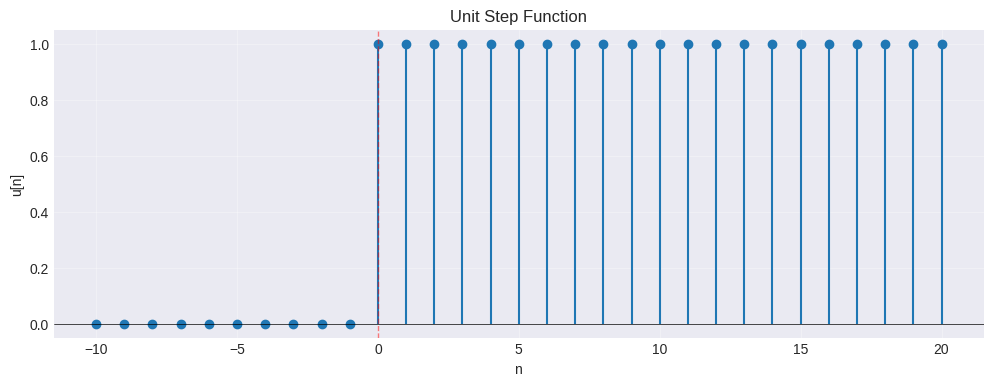

In [2]:
n = np.arange(-10, 21)
u = unit_step(n)

plt.figure(figsize=(12, 4))
plt.stem(n, u, basefmt=" ")
plt.xlabel('n')
plt.ylabel('u[n]')
plt.title('Unit Step Function')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.show()

### Unit Impulse (Delta Function)

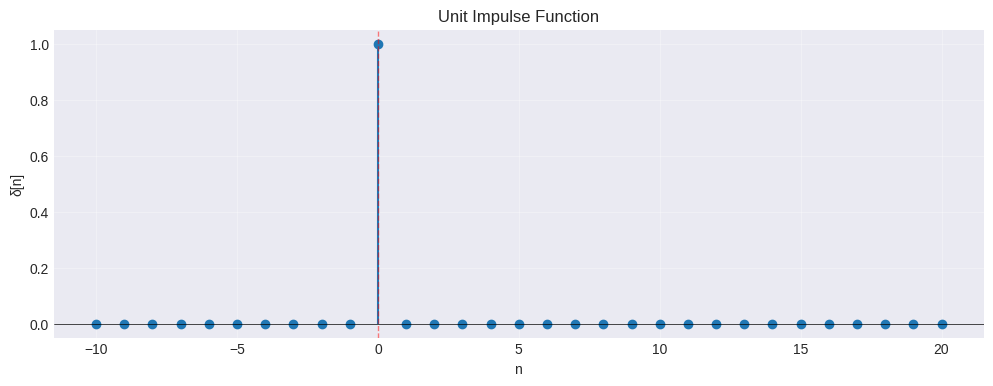

In [3]:
delta = unit_impulse(n)

plt.figure(figsize=(12, 4))
plt.stem(n, delta, basefmt=" ")
plt.xlabel('n')
plt.ylabel('δ[n]')
plt.title('Unit Impulse Function')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.show()

## 2. Common Signal Types

### Exponential Signals

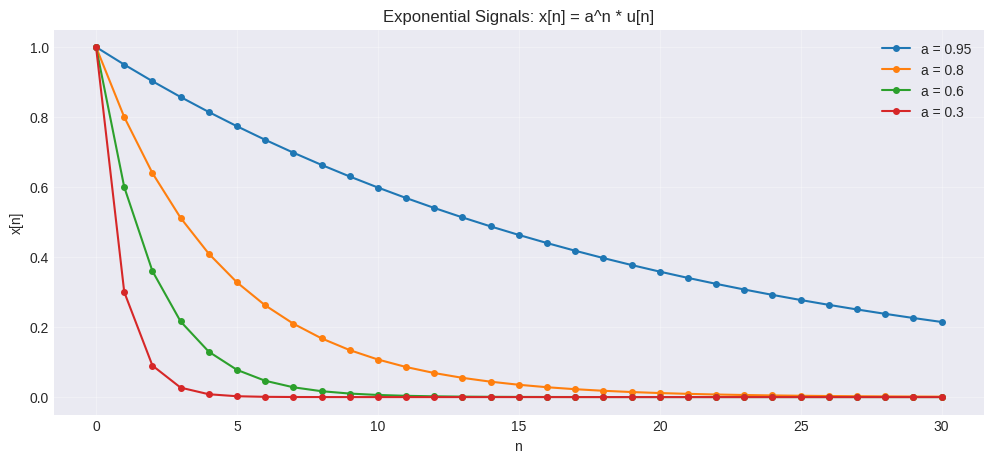

In [4]:
# Compare different exponential decay rates
n = np.arange(0, 31)

plt.figure(figsize=(12, 5))

for a in [0.95, 0.8, 0.6, 0.3]:
    x = exponential_signal(n, a)
    plt.plot(n, x, 'o-', label=f'a = {a}', markersize=4)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Exponential Signals: x[n] = a^n * u[n]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Discrete Sinusoidal Signals at Different Frequencies

Comparing discrete sinusoids at different normalized frequencies $f$.

In [ ]:
n = np.arange(0, 101)

plt.figure(figsize=(12, 8))

# Different normalized frequencies
frequencies = [0.05, 0.1, 0.2, 0.4]
for i, f in enumerate(frequencies):
    plt.subplot(2, 2, i+1)
    x = sinusoidal_signal(n, f)
    plt.stem(n, x, basefmt=" ")
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title(f'f = {f} (ω = {2*np.pi*f:.3f} rad/sample)')
    plt.grid(True, alpha=0.3)
    if f == 0.1:
        plt.axvline(x=10, color='r', linestyle='--', alpha=0.5, label=f'Period N={1/f}')
        plt.legend()

plt.tight_layout()
plt.show()

### Sampling and Discrete Signals

Understanding the relationship between continuous-time and discrete-time signals is fundamental. When we sample a continuous signal at rate $F_s$ (samples/second), the normalized frequency is $f = F/F_s$ (cycles/sample).

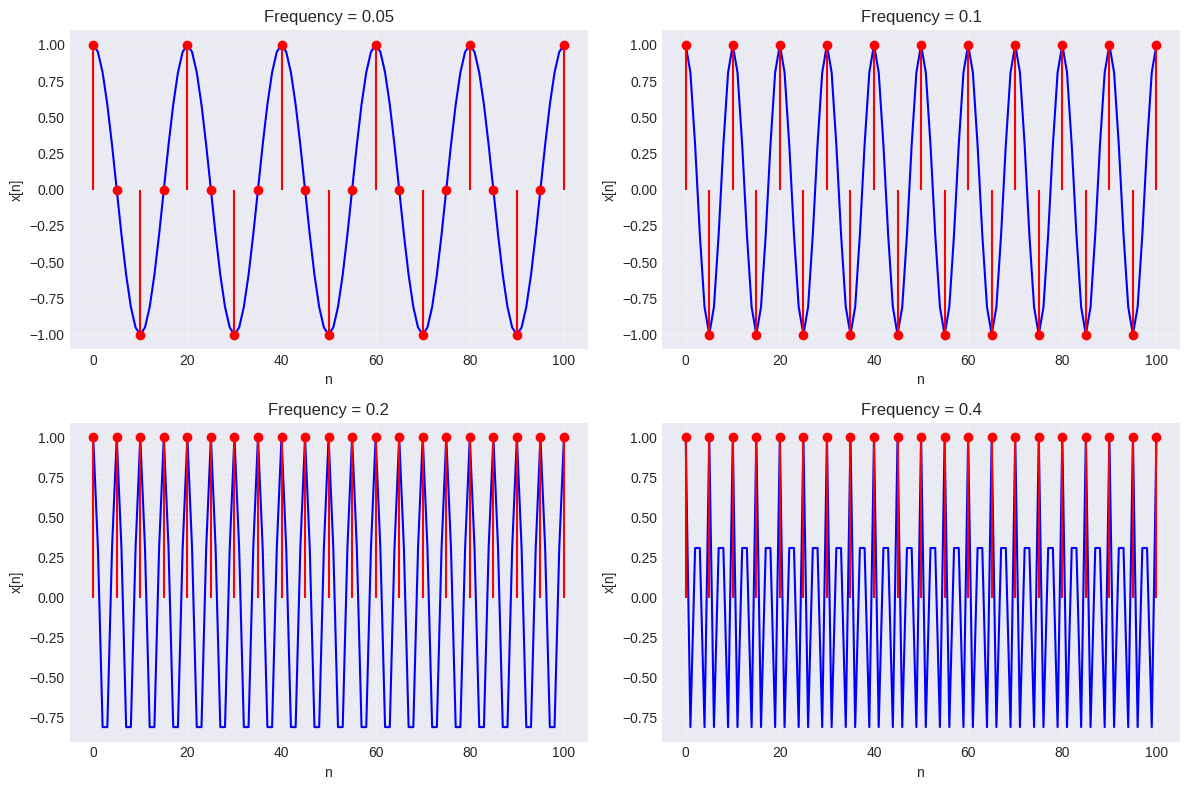

In [5]:
n = np.arange(0, 101)

plt.figure(figsize=(12, 8))

# Different frequencies
frequencies = [0.05, 0.1, 0.2, 0.4]
for i, f in enumerate(frequencies):
    plt.subplot(2, 2, i+1)
    x = sinusoidal_signal(n, f)
    plt.plot(n, x, 'b-', linewidth=1.5)
    plt.stem(n[::5], x[::5], basefmt=" ", linefmt='r-', markerfmt='ro')
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title(f'Frequency = {f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Impulse Response of Systems

### Moving Average Filter

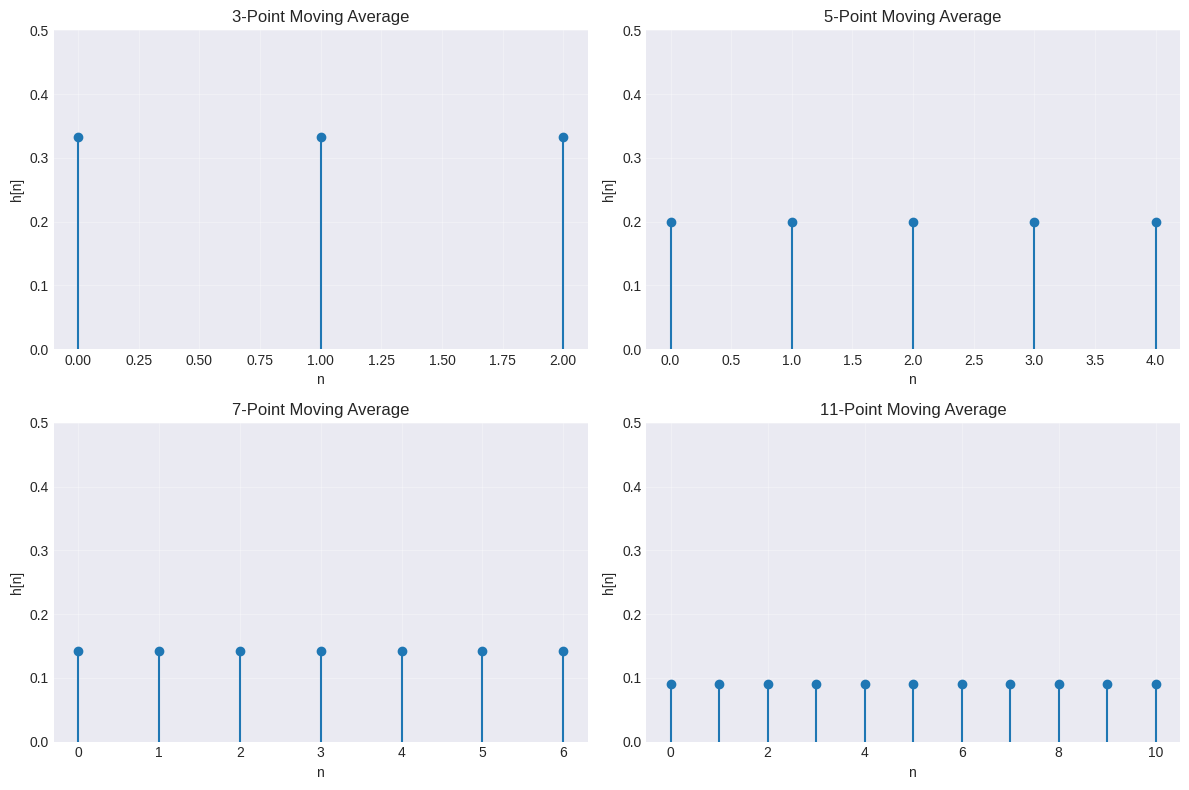

In [6]:
# Compare different window sizes
plt.figure(figsize=(12, 8))

for i, window in enumerate([3, 5, 7, 11]):
    h = moving_average_impulse_response(window)
    n_h = np.arange(len(h))
    
    plt.subplot(2, 2, i+1)
    plt.stem(n_h, h, basefmt=" ")
    plt.xlabel('n')
    plt.ylabel('h[n]')
    plt.title(f'{window}-Point Moving Average')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 0.5])

plt.tight_layout()
plt.show()

## 4. Linearity Test

Let's verify the linearity property of different systems.

In [ ]:
# Generate test signals
n_test = np.arange(20)
x1 = sinusoidal_signal(n_test, 0.1, amplitude=1.0)
x2 = exponential_signal(n_test, 0.9)

a, b = 2.0, -1.5

# Test scaling system (should be linear)
is_linear, lhs, rhs = verify_linearity(scaling_system, x1, x2, a, b)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_test, lhs, 'b-', label=r'System($a \cdot x_1 + b \cdot x_2$)', linewidth=2)
plt.plot(n_test, rhs, 'r--', label=r'$a \cdot$ System($x_1$) $+ b \cdot$ System($x_2$)', linewidth=2)
plt.xlabel('n')
plt.ylabel('Output')
plt.title(f'Scaling System - Linear: {is_linear}')
plt.legend()
plt.grid(True, alpha=0.3)

# Test squaring system (should be non-linear)
is_linear, lhs, rhs = verify_linearity(squaring_system, x1, x2, a, b)

plt.subplot(1, 2, 2)
plt.plot(n_test, lhs, 'b-', label=r'System($a \cdot x_1 + b \cdot x_2$)', linewidth=2)
plt.plot(n_test, rhs, 'r--', label=r'$a \cdot$ System($x_1$) $+ b \cdot$ System($x_2$)', linewidth=2)
plt.xlabel('n')
plt.ylabel('Output')
plt.title(f'Squaring System - Linear: {is_linear}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercise: Create Your Own Signals

Try creating different signals and exploring their properties!

In [ ]:
# Your code here
n = np.arange(-20, 41)

# TODO: Create a damped sinusoid (exponential * sinusoid)
# TODO: Create a rectangular pulse
# TODO: Experiment with different signal combinations